In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Load audio file
audio_file = 'onenote.wav'
y, sr = librosa.load(audio_file, sr=None)

# Parameters for CQT
hop_length = 512
n_bins = 84  # Number of bins per octave
bins_per_octave = 12  # Number of bins per octave

# Compute CQT spectrogram
CQT = librosa.cqt(y, sr=sr, hop_length=hop_length, n_bins=n_bins, bins_per_octave=bins_per_octave)

# Convert to magnitude spectrogram
mag_CQT = np.abs(CQT)

# Optionally, take the logarithm of the magnitude
log_mag_CQT = librosa.amplitude_to_db(mag_CQT)

# Now you can use log_mag_CQT as input to your neural network

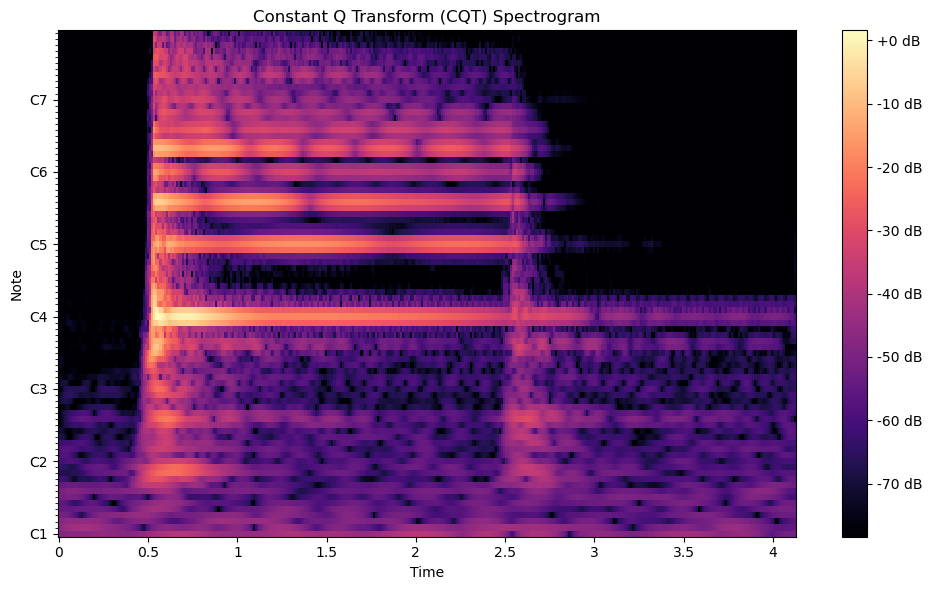

In [4]:
# Plot CQT spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(log_mag_CQT, sr=sr, hop_length=hop_length, x_axis='time', y_axis='cqt_note', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Constant Q Transform (CQT) Spectrogram')
plt.xlabel('Time')
plt.ylabel('Note')
plt.tight_layout()
plt.show()


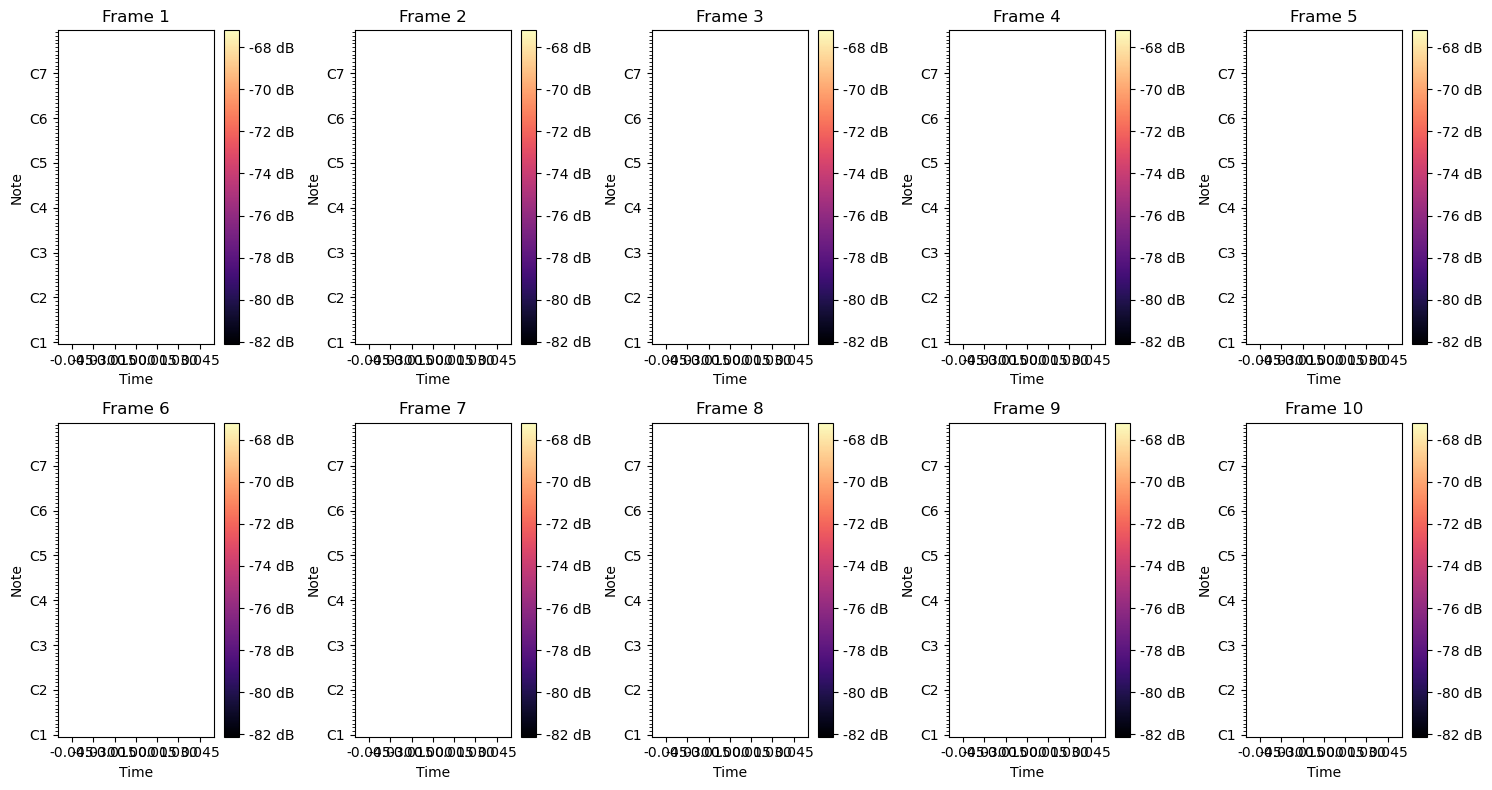

In [10]:
num_frames = 10
plt.figure(figsize=(15, 8))
for i in range(num_frames):
    plt.subplot(2, num_frames//2 + num_frames%2, i+1)
    librosa.display.specshow(log_mag_CQT[:, i][:, np.newaxis], sr=sr, hop_length=hop_length, x_axis='time', y_axis='cqt_note', cmap='magma')
    plt.title(f'Frame {i+1}')
    plt.colorbar(format='%+2.0f dB')
    plt.xlabel('Time')
    plt.ylabel('Note')

plt.tight_layout()
plt.show()